In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout

In [41]:
df = pd.read_csv("Karachi Meezan 30 Historical Data.csv")
df.head(15)

,Date,Price,Open,High,Low,Vol.,Change %
0,6/8/2009,"10,305.21","10,316.31","10,388.43","10,146.07",-,-79.37%
1,6/9/2009,"10,605.24","10,352.84","10,624.73","10,330.98",-,2.91%
2,6/10/2009,"10,455.34","10,615.70","10,671.65","10,433.30",-,-1.41%
3,6/11/2009,"10,466.04","10,470.62","10,536.33","10,393.05",-,0.10%
4,6/12/2009,"10,510.66","10,499.20","10,584.05","10,461.54",-,0.43%
5,6/13/2009,"10,510.66","10,499.20","10,584.05","10,461.54",-,0.00%
6,6/14/2009,"10,510.66","10,499.20","10,584.05","10,461.54",-,0.00%
7,6/15/2009,"10,434.17","10,540.68","10,540.68","10,540.68",-,-0.73%
8,6/16/2009,"10,297.08","10,540.68","10,540.68","10,540.68",-,-1.31%
9,6/17/2009,"10,611.60","10,672.67","10,672.67","10,672.67",-,3.05%


In [18]:
df.columns

Index(['Date', ' Price ', ' Open ', ' High ', ' Low ', ' Vol. ', 'Change %'], dtype='object')

In [20]:
df.rename(columns={'Date':'date',
                   ' Price ':'price'},inplace=True)

In [23]:
df = df[['date','price']]

In [24]:
df

,date,price
0,6/8/2009,"10,305.21"
1,6/9/2009,"10,605.24"
2,6/10/2009,"10,455.34"
3,6/11/2009,"10,466.04"
4,6/12/2009,"10,510.66"
...,...,...
5474,6/3/2024,"125,123.33"
5475,6/4/2024,"123,364.75"
5476,6/5/2024,"122,822.05"
5477,6/6/2024,"122,478.75"


In [37]:
df1 = df.reset_index()['price']
df1 = df1.str.strip()
df1 = df1.str.replace(',','')
df1 = df1.astype('float64')
df1

0        10305.21
1        10605.24
2        10455.34
3        10466.04
4        10510.66
          ...    
5474    125123.33
5475    123364.75
5476    122822.05
5477    122478.75
5478    122124.14
Name: price, Length: 5479, dtype: float64

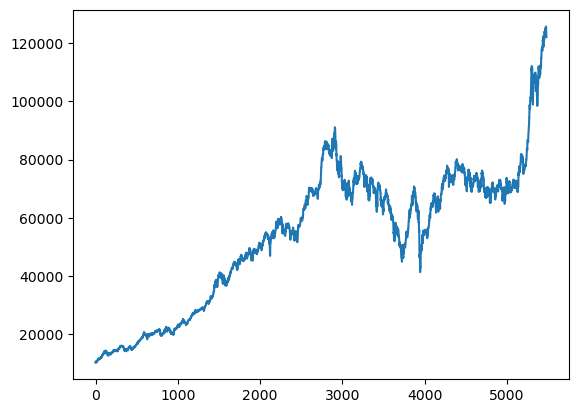

In [46]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [47]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[7.04001003e-05],
       [2.66844956e-03],
       [1.37042065e-03],
       ...,
       [9.74387352e-01],
       [9.71414615e-01],
       [9.68343941e-01]])

In [48]:
df1.shape

(5479, 1)

In [49]:
train_dataset_size = int(len(df1)*0.60)
test_dataset_size = int(len(df1)*0.20)
val_dataset_size = int(len(df1)*0.20)

In [51]:
train_data = df1[:train_dataset_size]
val_data = df1[train_dataset_size:train_dataset_size+val_dataset_size]
test_data = df1[train_dataset_size+val_dataset_size:]
train_data.shape, val_data.shape, test_data.shape

((3287, 1), (1095, 1), (1097, 1))

In [52]:
train_data

array([[7.04001003e-05],
       [2.66844956e-03],
       [1.37042065e-03],
       ...,
       [5.56330515e-01],
       [5.57680846e-01],
       [5.55912444e-01]])

In [65]:
def gen_data(dataset,lookback=30):
    data_x, data_y = [], []
    for i in range(len(dataset)-lookback):
        a = dataset[i:(i+lookback),0]
        data_x.append(a)
        data_y.append(dataset[i+lookback,0])
    return np.array(data_x), np.array(data_y)

In [67]:
lookback = 30
x_train, y_train = gen_data(train_data, lookback)
x_val, y_val = gen_data(val_data, lookback)
x_test, y_test = gen_data(test_data, lookback)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(3257, 30) (3257,)
(1065, 30) (1065,)
(1067, 30) (1067,)


In [68]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(3257, 30, 1) (3257,)
(1065, 30, 1) (1065,)
(1067, 30, 1) (1067,)


In [90]:
model = Sequential()
model.add(Input(shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,))
model.add(Dense(1))
model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
epochs = 100
batch_size = 64
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,y_val),
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0297 - val_loss: 6.2979e-04
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.7869e-04 - val_loss: 4.9092e-04
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.3330e-04 - val_loss: 4.6459e-04
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.3499e-04 - val_loss: 4.8727e-04
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.3122e-04 - val_loss: 5.4047e-04
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.3435e-04 - val_loss: 4.4654e-04
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.3370e-04 - val_loss: 4.5973e-04
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.3023e-04 - val_loss: 4.6148e-04
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.3612e-04 - val_loss: 4.2565e-04
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.3531e-04 - val_loss: 4.1659e-04
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.

In [99]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


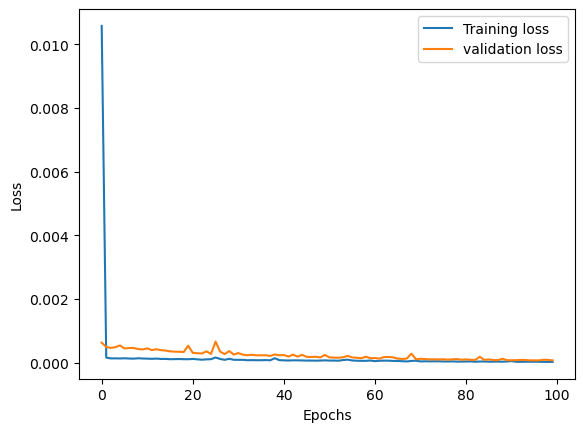

In [105]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(epochs),
         train_loss,
         label='Training loss')
plt.plot(range(epochs),
         val_loss,
         label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper right")

In [135]:
test_predict = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [136]:
test_predict = scaler.inverse_transform(test_predict)
test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [137]:
import math
math.sqrt(mean_squared_error(test_actual,test_predict))

927.0493442082828

In [138]:
test_predict.shape

(1067, 1)

In [139]:
test_actual.shape

(1067, 1)

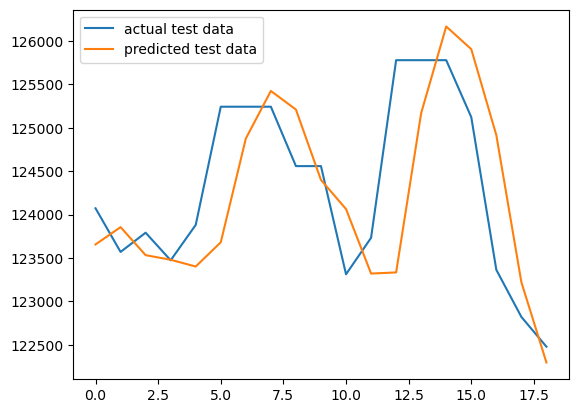

In [145]:

plt.plot(range(19),test_actual[-20:-1],label='actual test data')
plt.plot(range(19),test_predict[-20:-1], label='predicted test data')
plt.legend()

In [147]:
model.save('weights/stock_prediction_v1.keras')
model.save('weights/stock_prediction_v1.h5')

In [148]:
prediction_loss = test_actual - test_predict

In [149]:
prediction_loss

array([[-419.7978125],
       [1427.0825   ],
       [-458.09     ],
       ...,
       [-399.8953125],
       [ 181.6328125],
       [-115.1959375]])

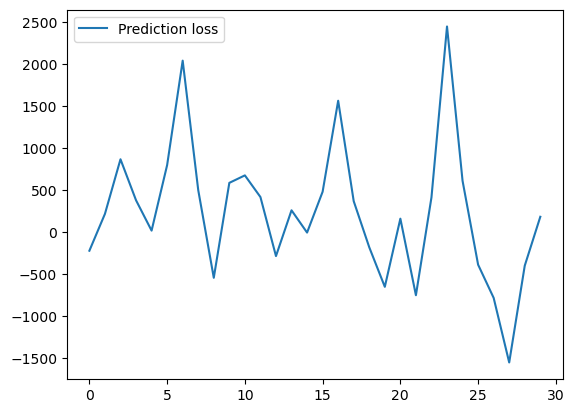

In [153]:
plt.plot(range(30),prediction_loss[-31:-1],label='Prediction loss')
plt.legend()